In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from os import listdir
from os.path import isfile, join
import numpy
import cv2
mypath="C:\\Users\\KBCI\\data\\data_macarons_M"
mypath2 = "C:\\Users\\KBCI\\data\\data_waffle_M"


onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles2 = [f for f in listdir(mypath2) if isfile(join(mypath2, f))]


macaron = numpy.empty(len(onlyfiles), dtype=object)
waffle = numpy.empty(len(onlyfiles2), dtype=object)


r_macaron = numpy.empty(len(onlyfiles), dtype=object)
r_waffle = numpy.empty(len(onlyfiles2), dtype=object)


for n in range(0, len(onlyfiles)):
    macaron[n] = cv2.imread(join(mypath, onlyfiles[n]), cv2.IMREAD_COLOR)
for n in range(0, len(onlyfiles2)):
    waffle[n] = cv2.imread(join(mypath2, onlyfiles2[n]), cv2.IMREAD_COLOR)


for i in range(len(macaron)):
    b, g, r = cv2.split(macaron[i])
    macaron[i] = cv2.merge([r, g, b])
for i in range(len(waffle)):
    b, g, r = cv2.split(waffle[i])
    waffle[i] = cv2.merge([r, g, b])


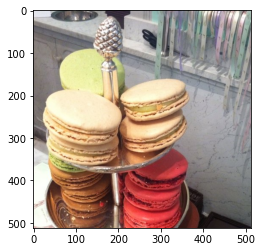

In [3]:
plt.imshow(macaron[2])

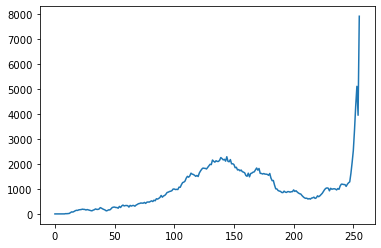

In [4]:
img_sample = macaron[2]
hist = cv2.calcHist([img_sample], [0], None, [256], [0, 256])
plt.plot(hist)
plt.show()

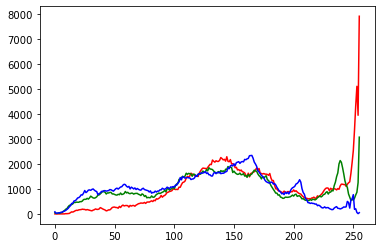

In [5]:
channels = cv2.split(img_sample)
colors = ['r','g','b']
for ch, color in zip(channels, colors):
    hist = cv2.calcHist([ch], [0],None, [256],[0,256])
    plt.plot(hist, color = color)
plt.show()

In [6]:
for mac in r_macaron:
    channels = cv2.split(mac)
    colors = ['r','g','b']
    for ch, color in zip(channels, colors):
        hist = cv2.calcHist([ch], [0],None, [256],[0,256])
        plt.plot(hist, color = color)
plt.show()

In [7]:
for waf in r_waffle:
    channels = cv2.split(waf)
    colors = ['r','g','b']
    for ch, color in zip(channels, colors):
        hist = cv2.calcHist([ch], [0],None, [256],[0,256])
        plt.plot(hist, color = color)
plt.show()

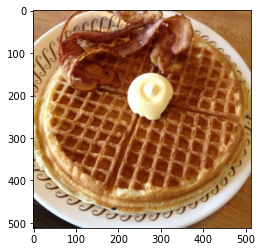

In [8]:
plt.imshow(waffle[43])

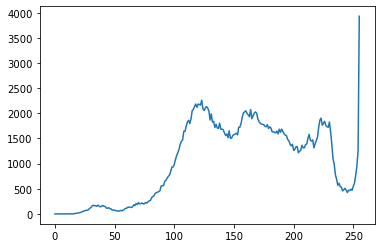

In [9]:
img_sample2 = waffle[43]
hist = cv2.calcHist([img_sample2], [0], None, [256], [0, 256])
plt.plot(hist)
plt.show()

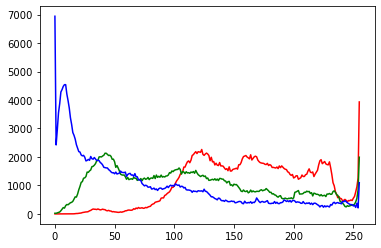

In [10]:
channels2 = cv2.split(img_sample2)
colors = ['r','g','b']
for ch, color in zip(channels2, colors):
    hist = cv2.calcHist([ch], [0],None, [256],[0,256])
    plt.plot(hist, color = color)
plt.show()

In [11]:
for n in range(0, len(onlyfiles)):
    r_macaron[n] = cv2.resize(macaron[n], dsize=(50, 50), interpolation=cv2.INTER_AREA)
for n in range(0, len(onlyfiles2)):
    r_waffle[n] = cv2.resize(waffle[n], dsize=(50, 50), interpolation=cv2.INTER_AREA)


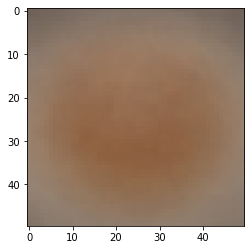

In [12]:
r, g, b = cv2.split(r_waffle[0])
avarage_r = r/1000
avarage_g = b/1000
avarage_b = g/1000
for i in range(1, len(r_waffle)):
    r, g, b = cv2.split(r_waffle[i])
    avarage_r += r/1000
    avarage_g += g/1000
    avarage_b += b/1000
avarage_waffle = cv2.merge([avarage_r.astype(int), avarage_g.astype(int), avarage_b.astype(int)])

plt.imshow(avarage_waffle)

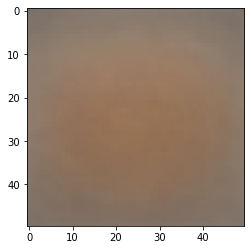

In [13]:
r, g, b = cv2.split(r_macaron[0])
avarage_r = r/1000
avarage_g = b/1000
avarage_b = g/1000
for i in range(1, len(r_macaron)):
    r, g, b = cv2.split(r_macaron[i])
    avarage_r += r/1000
    avarage_g += g/1000
    avarage_b += b/1000
avarage_macaron = cv2.merge([avarage_r.astype(int), avarage_g.astype(int), avarage_b.astype(int)])

plt.imshow(avarage_macaron)

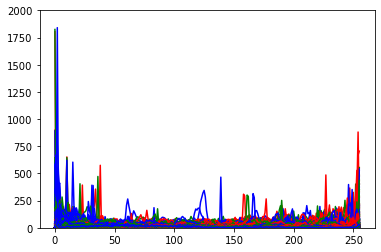

In [14]:
for mac in r_macaron:
    channels = cv2.split(mac)
    colors = ['r','g', 'b']
    for ch, color in zip(channels, colors):
        hist = cv2.calcHist([ch], [0],None, [256],[0,256])
        plt.plot(hist, color = color)
plt.ylim(0,2000)
plt.show()

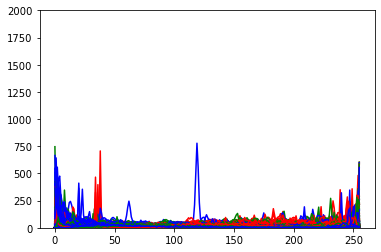

In [15]:
for waf in r_waffle:
    channels = cv2.split(waf)
    colors = ['r', 'g', 'b']
    for ch, color in zip(channels, colors):
        hist = cv2.calcHist([ch], [0],None, [256],[0,256])
        plt.plot(hist, color = color)
plt.ylim(0,2000)
plt.show()

In [16]:
lis_macaron = []
lis_waffle = []


y = []
for i in range(len(r_macaron)):
    lis_macaron.append(r_macaron[i].flatten())
    y.append(0)
for i in range(len(r_waffle)):
    lis_waffle.append(r_waffle[i].flatten())
    y.append(1)



In [17]:
import keras

In [18]:
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [19]:
X = lis_macaron + lis_waffle #+ lis_apple
# nx = r_macaron + r_waffle
# nx = np.array(nx)
X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
X_train = X_train.reshape(-1,50*50*3)/255
X_test = X_test.reshape(-1,50*50*3)/255
print(y_test.shape)
print(X_test.shape)

(400,)
(400, 7500)


In [21]:
y_test

array([1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,

In [22]:
from keras.models import Sequential
from keras.layers import Dense

in_size = 50*50*3 

num_classes = 10

#[1]
model = Sequential()
#[2]
model.add(Dense(512, activation='relu', input_shape=(in_size,)))
#[3]
model.add(Dense(num_classes,activation='softmax'))

In [23]:
model.compile(
    #[1]
    loss = 'sparse_categorical_crossentropy',
    #[2]
    optimizer = 'adam',
    #[3]
    metrics = ['accuracy']
)

In [24]:
hist = model.fit(X_train, y_train,
                batch_size=20, 
                epochs = 35,
                verbose=1,
                validation_data=(X_test, y_test))

Epoch 1/35
80/80 [==============================] - 3s 31ms/step - loss: 2.6264 - accuracy: 0.5424 - val_loss: 1.1218 - val_accuracy: 0.5700
Epoch 2/35
80/80 [==============================] - 2s 23ms/step - loss: 1.8703 - accuracy: 0.5639 - val_loss: 1.2480 - val_accuracy: 0.5475
Epoch 3/35
80/80 [==============================] - 2s 23ms/step - loss: 0.8479 - accuracy: 0.6173 - val_loss: 0.7549 - val_accuracy: 0.6250
Epoch 4/35
80/80 [==============================] - 2s 23ms/step - loss: 0.8736 - accuracy: 0.6187 - val_loss: 0.7665 - val_accuracy: 0.5925
Epoch 5/35
80/80 [==============================] - 2s 23ms/step - loss: 0.6835 - accuracy: 0.6651 - val_loss: 0.7828 - val_accuracy: 0.6125
Epoch 6/35
80/80 [==============================] - 2s 23ms/step - loss: 0.7949 - accuracy: 0.6608 - val_loss: 0.7328 - val_accuracy: 0.5925
Epoch 7/35
80/80 [==============================] - 2s 24ms/step - loss: 0.7858 - accuracy: 0.6544 - val_loss: 0.7277 - val_accuracy: 0.6000
Epoch 8/35
80

In [25]:
score = model.evaluate(X_test, y_test, verbose=1)
print('정답률 = ', score[1],'loss=', score[0])

13/13 [==============================] - 0s 11ms/step - loss: 0.7183 - accuracy: 0.6375
정답률 =  0.637499988079071 loss= 0.7182974219322205


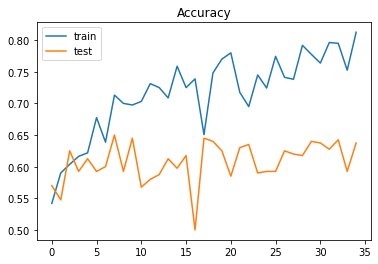

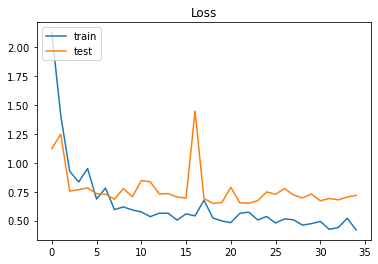

In [26]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()